<a href="https://colab.research.google.com/github/MatthiasYeoEeLiang/BT4012-Project/blob/main/Group18_BT4012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from matplotlib import pyplot as plt
from scipy import stats
from pyitlib import discrete_random_variable as drv
import seaborn as sns

Exploratory Data Analysis

In [3]:
df = pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


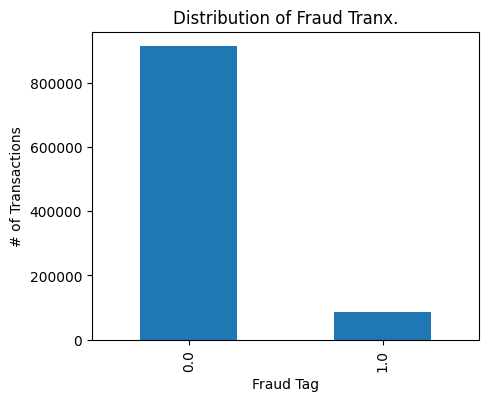

In [4]:
# count of fraud vs not fraud
plt.figure(figsize=(5, 4))
df['fraud'].value_counts().plot(kind='bar')
plt.title('Distribution of Fraud Tranx.')
plt.xlabel('Fraud Tag')
plt.ylabel('# of Transactions')
plt.show()

Text(0.5, 1.0, 'Distribution of Transactions with fraud = 1')

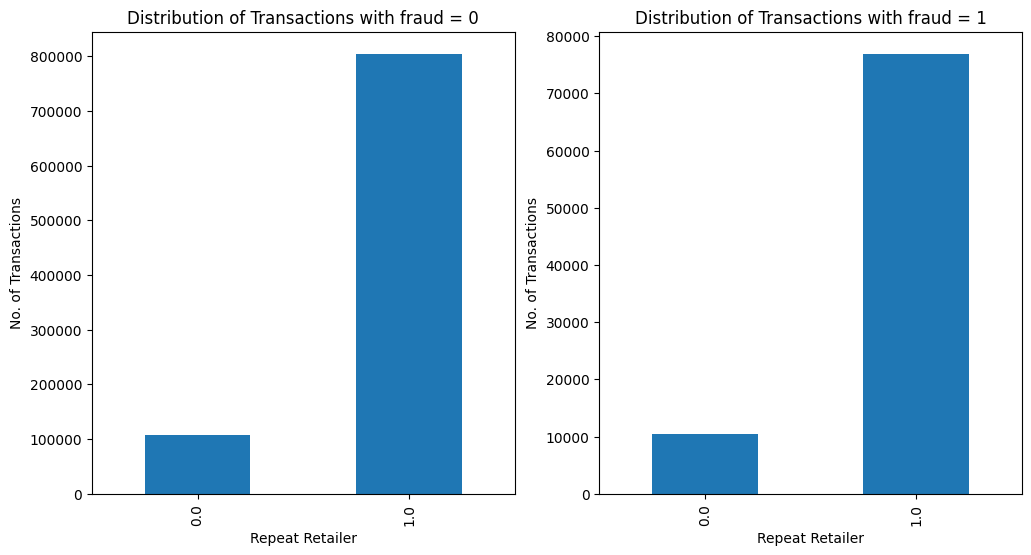

In [5]:
# repeat_retailer of fraud = 0 vs fraud = 1
plt.figure(figsize=(12,6))
repeat_retailer = df.loc[:, ['fraud', 'repeat_retailer']]
repeat_retailer_0 = repeat_retailer[repeat_retailer.fraud == 0]
repeat_retailer_1 = repeat_retailer[repeat_retailer.fraud == 1]

plt.subplot(1,2,1)
repeat_retailer_0.groupby('repeat_retailer').size().plot.bar()
plt.xlabel('Repeat Retailer')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 0')

plt.subplot(1,2,2)
repeat_retailer_1.groupby('repeat_retailer').size().plot.bar()
plt.xlabel('Repeat Retailer')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 1')

Text(0.5, 1.0, 'Distribution of Transactions with fraud = 1')

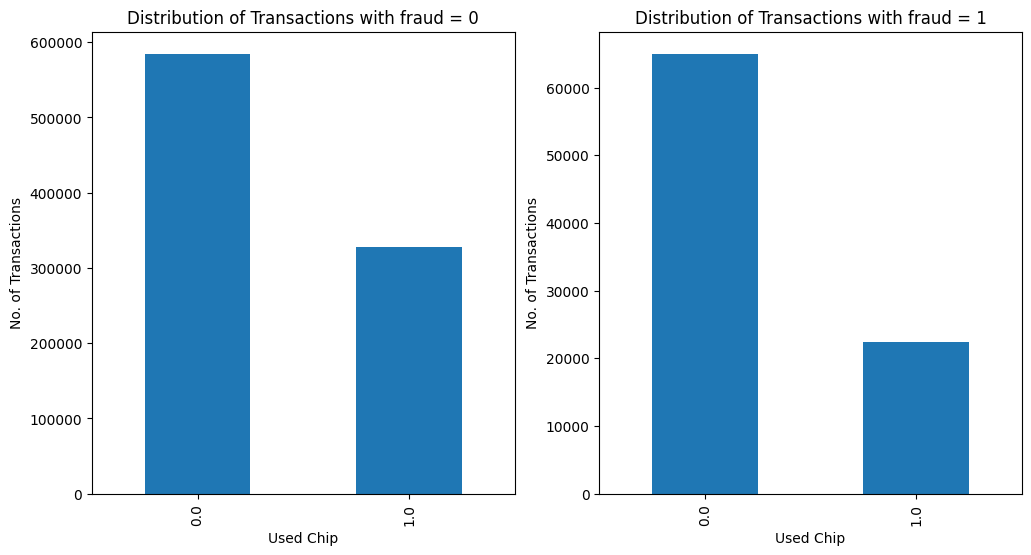

In [6]:
# used_chip of fraud = 0 vs fraud = 1
plt.figure(figsize=(12,6))
used_chip = df.loc[:, ['fraud', 'used_chip']]
used_chip_0 = df[df.fraud == 0]
used_chip_1 = df[df.fraud == 1]

plt.subplot(1,2,1)
used_chip_0.groupby('used_chip').size().plot.bar()
plt.xlabel('Used Chip')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 0')

plt.subplot(1,2,2)
used_chip_1.groupby('used_chip').size().plot.bar()
plt.xlabel('Used Chip')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 1')

Text(0.5, 1.0, 'Distribution of Transactions with fraud = 1')

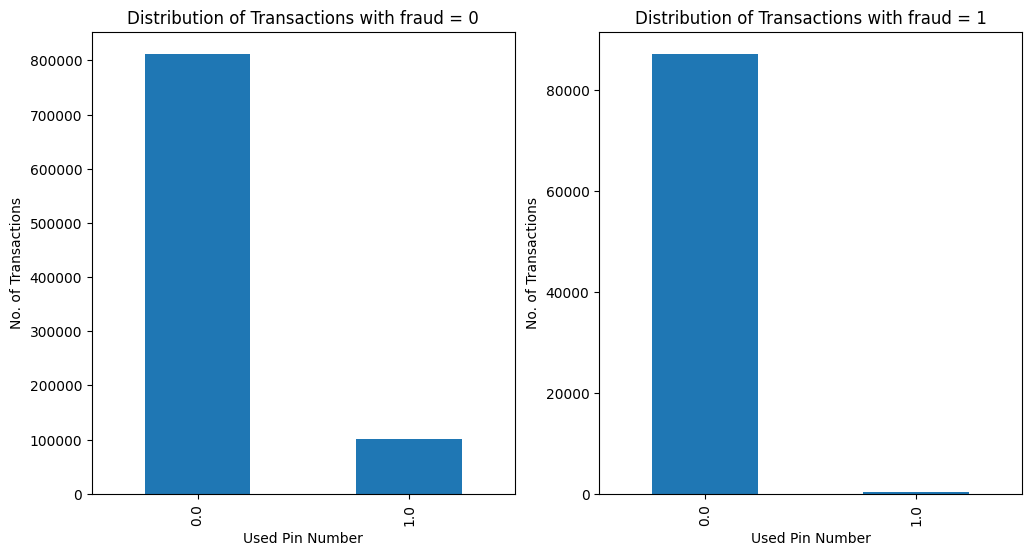

In [7]:
# used_pin_number of fraud = 0 vs fraud = 1
plt.figure(figsize=(12,6))
used_pin_number = df.loc[:, ['fraud', 'used_pin_number']]
used_pin_number_0 = df[df.fraud == 0]
used_pin_number_1 = df[df.fraud == 1]

plt.subplot(1,2,1)
used_pin_number_0.groupby('used_pin_number').size().plot.bar()
plt.xlabel('Used Pin Number')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 0')

plt.subplot(1,2,2)
used_pin_number_1.groupby('used_pin_number').size().plot.bar()
plt.xlabel('Used Pin Number')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 1')

Text(0.5, 1.0, 'Distribution of Transactions with fraud = 1')

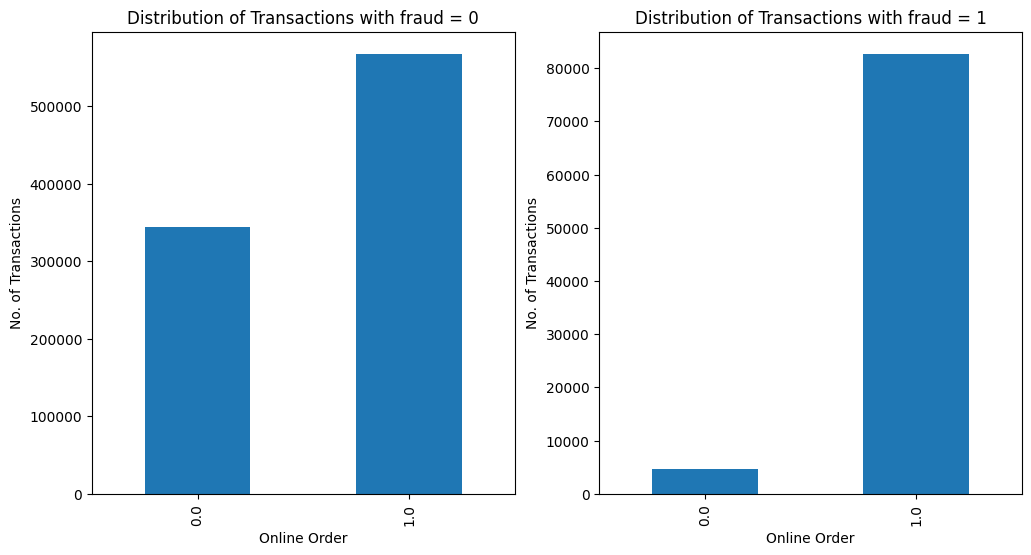

In [8]:
# online_order of fraud = 0 vs fraud = 1
plt.figure(figsize=(12,6))
online_order = df.loc[:, ['fraud', 'online_order']]
online_order_0 = df[df.fraud == 0]
online_order_1 = df[df.fraud == 1]

plt.subplot(1,2,1)
online_order_0.groupby('online_order').size().plot.bar()
plt.xlabel('Online Order')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 0')

plt.subplot(1,2,2)
online_order_1.groupby('online_order').size().plot.bar()
plt.xlabel('Online Order')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 1')

In [9]:
# Chi square test (Categorical vs Categorical)
cat_vars = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
p_values = []
chai_stats = []
for cat1 in cat_vars:
    for cat2 in cat_vars:
            crosstab = pd.crosstab(df[cat1], df[cat2])
            chai2, p_val, _, _ = stats.chi2_contingency(crosstab)
            p_values.append((cat1, cat2, p_val))
            chai_stats.append((cat1, cat2, chai2))
     

chisquare = pd.DataFrame(p_values, columns=['cat1', 'cat2', 'p-value'])
chisquare.pivot_table(index='cat1', columns='cat2', values='p-value')

cat2,fraud,online_order,repeat_retailer,used_chip,used_pin_number
cat1,,,,,
fraud,0.000000,0.000000,0.176384,0.000000,0.000000
online_order,0.000000,0.000000,0.596807,0.828524,0.773724
repeat_retailer,0.176384,0.596807,0.000000,0.179747,0.680158
used_chip,0.000000,0.828524,0.179747,0.000000,0.164619
used_pin_number,0.000000,0.773724,0.680158,0.164619,0.000000


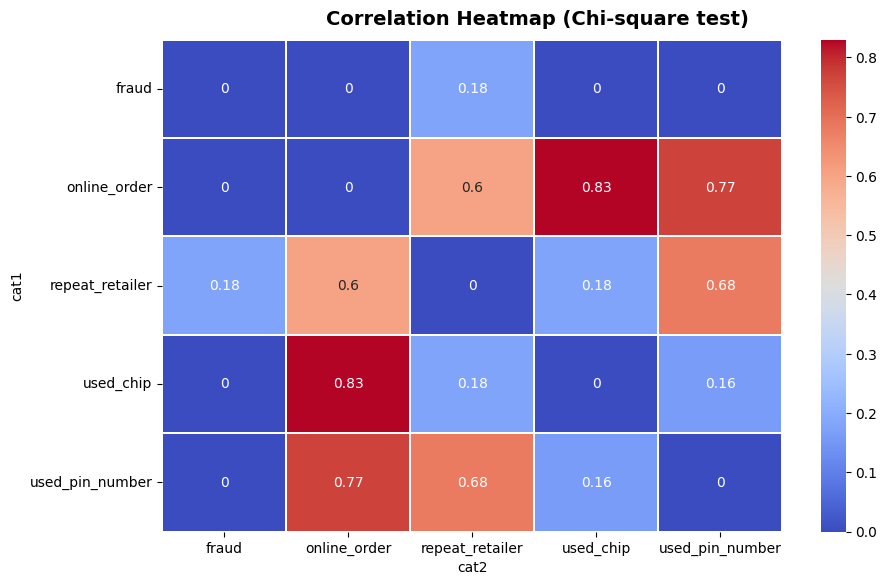

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

hm = sns.heatmap(round(chisquare.pivot_table(index='cat1', columns='cat2', values='p-value'),2), 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('Correlation Heatmap (Chi-square test)', fontsize=14, fontweight='bold')

In [19]:
# Information Gain (Categorical vs Categorical)

# Compute Entropy
# train = pd.DataFrame()
# for x in cat_vars:
#     train[x] = [1, 0, 0]
# entropies = pd.DataFrame([(x, drv.entropy(train[x])) for x in cat_vars], columns=['cat1', 'H(cat1)'])
entropies = pd.DataFrame([(x, drv.entropy(df[x])) for x in cat_vars], columns=['cat1', 'H(cat1)'])

# Compute Conditional Entropy
# results = []
# for cat1 in cat_vars:
#     for cat2 in cat_vars:
#         if cat1!=cat2:
#             results.append((cat1, cat2, drv.entropy_conditional(df[cat1], df[cat2])))

# conditional_entropy = pd.DataFrame(results, columns=['cat1', 'cat2', 'H(cat1|cat2)'])

# information_gain = entropies.merge(conditional_entropy)
# information_gain['information gain'] = information_gain['H(cat1)'] - information_gain['H(cat1|cat2)']

# information_gain.head()

AssertionError: 